In [ ]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd
from constants.utils import API_KEY_NOBIL

# load_dotenv()                 # läser .env
# API_KEY = os.getenv("API_KEY")

params = {
        "apikey": API_KEY,
        "countrycode": "SWE",
        "format": "json",
        "file": "false"
    }

url = "https://nobil.no/api/server/datadump.php"

response = requests.get(url=url, params=params)
response.raise_for_status()
data = response.json()

df_infra_infra_infra = pd.DataFrame(data)


In [27]:
df.shape
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Provider         9003 non-null   object
 1   Rights           9003 non-null   object
 2   apiver           9003 non-null   object
 3   chargerstations  9003 non-null   object
dtypes: object(4)
memory usage: 281.5+ KB


,Provider,Rights,apiver,chargerstations
0,NOBIL.no,Creative Commons Attribution 4.0 International...,3,"{'csmd': {'id': 14671, 'name': 'Agnesfridsväge..."
1,NOBIL.no,Creative Commons Attribution 4.0 International...,3,"{'csmd': {'id': 54376, 'name': 'Reload Filipst..."
2,NOBIL.no,Creative Commons Attribution 4.0 International...,3,"{'csmd': {'id': 36573, 'name': 'Källhage Fast ..."
3,NOBIL.no,Creative Commons Attribution 4.0 International...,3,"{'csmd': {'id': 54401, 'name': 'Jönköpings kom..."
4,NOBIL.no,Creative Commons Attribution 4.0 International...,3,"{'csmd': {'id': 18856, 'name': '500', 'ocpidb_..."


In [29]:
df.iloc[0].to_dict()


{'Provider': 'NOBIL.no',
 'Rights': 'Creative Commons Attribution 4.0 International License',
 'apiver': '3',
 'chargerstations': {'csmd': {'id': 14671,
   'name': 'Agnesfridsvägen 193',
   'ocpidb_mapping_stasjon_id': 'SE#VAT#75dbcba6-8bdf-4c70-9b5e-c7e2ab4dd50d',
   'Street': 'Agnesfridsvägen',
   'House_number': '193',
   'Zipcode': '21375',
   'City': 'Malmö',
   'Municipality_ID': '1280',
   'Municipality': 'Malmö',
   'County_ID': '12',
   'County': 'SKÅNE',
   'Description_of_location': None,
   'Owned_by': 'Vattenfall InCharge',
   'Operator': 'Vattenfall InCharge',
   'Number_charging_points': 15,
   'Position': '(55.561056,13.036717)',
   'Image': 'no.image.svg',
   'Available_charging_points': 15,
   'User_comment': None,
   'Contact_info': None,
   'Created': '2023-04-24 09:31:42',
   'Updated': '2025-09-20 23:13:17',
   'Station_status': 1,
   'Land_code': 'SWE',
   'International_id': 'SWE_14671'},
  'attr': {'st': {'24': {'attrtypeid': '24',
     'attrname': 'Open 24h',


In [30]:
df.applymap(lambda x: isinstance(x, (dict, list))).sum()


/var/folders/_6/t8g0_t_n1_9bcmhw9_c95wnc0000gn/T/ipykernel_97511/2640639745.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, (dict, list))).sum()


Provider              0
Rights                0
apiver                0
chargerstations    9003
dtype: int64

In [31]:
df.describe(include="all").T


,count,unique,top,freq
Provider,9003,1,NOBIL.no,9003
Rights,9003,1,Creative Commons Attribution 4.0 International...,9003
apiver,9003,1,3,9003
chargerstations,9003,9003,"{'csmd': {'id': 14671, 'name': 'Agnesfridsväge...",1


In [32]:
df.isna().sum()


Provider           0
Rights             0
apiver             0
chargerstations    0
dtype: int64

In [35]:
df.info()
df.iloc[0].to_dict()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Provider         9003 non-null   object
 1   Rights           9003 non-null   object
 2   apiver           9003 non-null   object
 3   chargerstations  9003 non-null   object
dtypes: object(4)
memory usage: 281.5+ KB


{'Provider': 'NOBIL.no',
 'Rights': 'Creative Commons Attribution 4.0 International License',
 'apiver': '3',
 'chargerstations': {'csmd': {'id': 14671,
   'name': 'Agnesfridsvägen 193',
   'ocpidb_mapping_stasjon_id': 'SE#VAT#75dbcba6-8bdf-4c70-9b5e-c7e2ab4dd50d',
   'Street': 'Agnesfridsvägen',
   'House_number': '193',
   'Zipcode': '21375',
   'City': 'Malmö',
   'Municipality_ID': '1280',
   'Municipality': 'Malmö',
   'County_ID': '12',
   'County': 'SKÅNE',
   'Description_of_location': None,
   'Owned_by': 'Vattenfall InCharge',
   'Operator': 'Vattenfall InCharge',
   'Number_charging_points': 15,
   'Position': '(55.561056,13.036717)',
   'Image': 'no.image.svg',
   'Available_charging_points': 15,
   'User_comment': None,
   'Contact_info': None,
   'Created': '2023-04-24 09:31:42',
   'Updated': '2025-09-20 23:13:17',
   'Station_status': 1,
   'Land_code': 'SWE',
   'International_id': 'SWE_14671'},
  'attr': {'st': {'24': {'attrtypeid': '24',
     'attrname': 'Open 24h',


In [ ]:
import dlt
import requests
import sys
from constants.utils import API_KEY_NOBIL, DATE_NOW

dlt.config["load.truncate_staging_dataset"] = True


_catched_data = None


def _get_url():
    params = {
        "apikey": API_KEY_NOBIL,
        "countrycode": "SWE",
        "format": "json",
        "file": "false",
        "fromdate": DATE_NOW,
    }

    url = "https://nobil.no/api/server/datadump.php"

    r = requests.get(url=url, params=params)
    r.raise_for_status()

    if r.status_code != 200:
        print("Fel (body):", r.text[:400])
        sys.exit(1)

    try:
        data = r.json()
    except Exception:
        print("Svar kunde inte tolkas som JSON.")
        print(r.text[:800])
        sys.exit(1)

    if not data:
        print("Ingen data returnerad.")
        sys.exit(0)

    return data


def _get_catched_data():
    global _catched_data
    if _catched_data is None:
        _catched_data = _get_url()
    return _catched_data



@dlt.resource(table_name="csmd",write_disposition="replace")
def csmd_data():
    data = _get_catched_data()
   
    stations = data.get("chargerstations", [])

    if not stations:
        return

    for station in stations:
        yield station["csmd"]


@dlt.resource(table_name="status_online", write_disposition="replace")
def status_online_data():
    
    data = _get_catched_data()
    
    stations = data.get("chargerstations", [])

    if not stations:
        return

    for station in stations:
        station_id = station["csmd"].get("id")
        update_date = station["csmd"].get("Updated")
        st_dict = station.get("attr", {}).get("st", {})

        for key, attr in st_dict.items():
            yield {
                "station_id": station_id,
                "updated_date": update_date,
                "attr_key": key,
                "attrtypeid": attr.get("attrtypeid"),
                "attrname": attr.get("attrname"),
                "attrvalid": attr.get("attrvalid"),
                "trans": attr.get("trans"),
                "attrval": attr.get("attrval"),
            }


@dlt.resource(table_name="connector", write_disposition="replace")
def connector_data():
    data = _get_catched_data()
    stations = data.get("chargerstations", [])

    if not stations:
        return

    for station in stations:
        station_id = station["csmd"].get("id")
        update_date = station["csmd"].get("Updated")
        conn_dict = station.get("attr", {}).get("conn", {})

        for connector_nr, attributes in conn_dict.items():
            for _, attr in attributes.items():
                yield {
                    "station_id": station_id,
                    "updated_date": update_date,
                    "connector_nr": connector_nr,
                    "attrtypeid": attr.get("attrtypeid"),
                    "attrname": attr.get("attrname"),
                    "attrvalid": attr.get("attrvalid"),
                    "trans": attr.get("trans"),
                    "attrval": attr.get("attrval"),
                }


@dlt.source
def nobil_source():
    return [
        csmd_data(),
        status_online_data(),
        connector_data(),
    ]



In [ ]:
# ==================== #
#                      #
#        imports       #
#                      #
# ==================== #

from pathlib import Path
import sys
import dlt
import dagster as dg

from dagster_dlt import DagsterDltResource, dlt_assets
from dagster_dbt import DbtCliResource, DbtProject, dbt_assets


# ==================== #
#                      #
#   import dlt source  #
#                      #
# ==================== #

# gör så att Dagster hittar ditt dlt-script
sys.path.insert(0, "../data_extract_load")

from load_nobil import nobil_source


# ==================== #
#                      #
#     dlt resource     #
#                      #
# ==================== #

# This create a Dagster resource
dlt_resource = DagsterDltResource()


# ==================== #
#                      #
#     dlt assets       #
#                      #
# ==================== #

# This is the same idea for when you run dlt seperently. But here it create a Dagster asset for every dlt.resource
# It's the bridge between dlt and Dagster
@dlt_assets(
    dlt_source=nobil_source(),
    dlt_pipeline=dlt.pipeline(
        pipeline_name="nobil_pipeline",
        dataset_name="staging",
        destination=dlt.destinations.duckdb("data.duckdb"),
    ),
)
def dlt_load(context: dg.AssetExecutionContext,dlt: DagsterDltResource):
    yield from dlt.run(context=context)


# ==================== #
#                      #
#      dbt assets      #
#                      #
# ==================== #

dbt_project_dir = Path(__file__).parents[1] / "data_transform"
profiles_dir = Path.home() / ".dbt"

dbt_project = DbtProject(
    project_dir=dbt_project_dir,
    profiles_dir=profiles_dir,
)

dbt_resource = DbtCliResource(project_dir=dbt_project)

# This important for Dagster to understand the dbt linage
dbt_project.prepare_if_dev()


@dbt_assets(manifest=dbt_project.manifest_path)
def dbt_models(
    context: dg.AssetExecutionContext,
    dbt: DbtCliResource,
):
    yield from dbt.cli(["build"], context=context).stream()


# ==================== #
#                      #
#         jobs         #
#                      #
# ==================== #

# Run ALL dlt-assets from nobil_source
job_dlt = dg.define_asset_job(
    name="job_dlt",
    selection=dg.AssetSelection.key_prefixes("dlt_nobil_source"),
)

# kör alla dbt-modeller (justera prefix vid behov)
job_dbt = dg.define_asset_job(
    name="job_dbt",
    selection=dg.AssetSelection.all(),
)


# ==================== #
#                      #
#       schedule       #
#                      #
# ==================== #

schedule_dlt = dg.ScheduleDefinition(
    job=job_dlt,
    cron_schedule="0 02 * * *",  # 02:00 UTC
)


# ==================== #
#                      #
#        sensor        #
#                      #
# ==================== #

@dg.asset_sensor(
    asset_key=dg.AssetKey("dlt_nobil_source_csmd"),
    job_name="job_dbt",
)
def dlt_to_dbt_sensor():
    yield dg.RunRequest()


# ==================== #
#                      #
#     definitions      #
#                      #
# ==================== #

defs = dg.Definitions(
    assets=[
        dlt_load,
        dbt_models,
    ],
    resources={
        "dlt": dlt_resource,
        "dbt": dbt_resource,
    },
    jobs=[
        job_dlt,
        job_dbt,
    ],
    schedules=[
        schedule_dlt,
    ],
    sensors=[
        dlt_to_dbt_sensor,
    ],
)


In [ ]:
# import requests
# from constants.utils import API_KEY_NOBIL, DATE_NOW
# import sys
# import dlt
# from pathlib import Path


# path_duckdb = str(Path(__file__).parents[1] / "data_warehouse/data.duckdb")

# _catched_data = None


# def _get_url():

#     params = {
#         "apikey": API_KEY_NOBIL,
#         "countrycode": "SWE",
#         "format": "json",
#         "file": "false",
#         "fromdate": DATE_NOW
#     }

#     url = "https://nobil.no/api/server/datadump.php"

#     r = requests.get(url=url, params=params)
#     r.raise_for_status()

#     if r.status_code != 200:
#         print("Fel (body):", r.text[:400])
#         sys.exit(1)

#     try:
#         data = r.json()
#     except Exception:
#         print("Svar kunde inte tolkas som JSON. Rätt svar:")
#         print(r.text[:800])
#         sys.exit(1)

#     if not data:
#         print("Ingen data returnerad.")
#         sys.exit(0)

#     else:
#         return data


# def _get_catched_data():
#     global _catched_data
#     if _catched_data is None:
#         _catched_data = _get_url()
#     return _catched_data


# @dlt.resource(write_disposition="replace", name= "csmd_table_update")
# def csmd_data():

#     data = _get_catched_data()

#     batch = data.get("chargerstations", [])
#     print(f"DEBUG: antal stationer i chargerstations: {len(batch)= }")

#     if not batch:
#         print("DEBUG: No data - stopping processe")
#         return

#     print("DEBUG: Start yield for pipeline")
#     for station in batch:
#         yield station["csmd"]


# @dlt.resource(write_disposition="replace", name="status_online_table_update")
# def status_online_data():

#     data = _get_catched_data()

#     batch = data.get("chargerstations", [])
#     print(f"DEBUG: antal stationer i chargerstations: {len(batch)= }")

#     if not batch:
#         print("DEBUG: No data - stopping processe")
#         return

#     print("Start yield for pipeline")
#     for station in batch:

#         station_id = station["csmd"].get("id")
#         update_date = station["csmd"]["Updated"]
#         st_dict = station["attr"]["st"]
        
        
#         for key, attr in st_dict.items():

#             yield {
#                 "station_id": station_id,
#                 "updated_date": update_date,
#                 "attr_key": key,
#                 "attrtypeid": attr.get("attrtypeid"),
#                 "attrname": attr.get("attrname"),
#                 'attrvalid': attr.get("attrvalid"),
#                 'trans': attr.get("trans"),
#                 'attrval': attr.get("attrval")
#             }
        
        
# @dlt.resource(write_disposition="replace", name="connector_table_update")
# def connector_data():

#     data = _get_catched_data()

#     batch = data.get("chargerstations", [])
#     print(f"DEBUG: antal stationer i chargerstations: {len(batch)= }")

#     if not batch:
#         print("DEBUG: No data - stopping processe")
#         return

#     print("Start yield for pipeline")
#     for station in batch:
        
#         station_id = station["csmd"].get("id")
#         update_date = station["csmd"]["Updated"]
#         data_conn = station["attr"]["conn"]
        
#         for connector in data_conn.keys():
            
#             data_attribute = station["attr"]["conn"][connector]
#             for key in data_attribute.keys():
#                 yield {
#                     "station_id": station_id,
#                     "updated_date": update_date,
#                     "connector_nr": connector,
#                     "attrtypeid": data_conn[connector][key].get("attrtypeid"),
#                     "attrname": data_conn[connector][key].get("attrname"),
#                     "attrvalid": data_conn[connector][key].get("attrvalid"),
#                     "trans": data_conn[connector][key].get("trans"),
#                     "attrval": data_conn[connector][key].get("attrval")
#                 }


# def run_pipeline():
#     pipeline = dlt.pipeline(
#         pipeline_name="charger_station",
#         destination=dlt.destinations.duckdb(path_duckdb),
#         dataset_name="staging",
#     )
    
#     info = pipeline.run(data=[csmd_data(), status_online_data(), connector_data()])

#     return info

# if __name__ == "__main__":

#     run_pipeline()

In [ ]:
# main.py
import streamlit as st
from frontend.dashboard import home_page
from frontend.dashboard.pages import charger_analys_page

st.set_page_config(
    page_title="Laddinfrastruktur i Sverige – Översikt",
    page_icon="🔌",
    layout="wide"
)

# Sidebar
st.sidebar.title("Navigation")

page = st.sidebar.selectbox(
    "Välj sida",
    options=["Home", "Charger analys"],
    index=0
)

if page == "Home":
    home_page.layout()
elif page == "Charger analys":
    charger_analys_page.layout()


In [17]:
import os
from dotenv import load_dotenv
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
    database=os.getenv("SNOWFLAKE_DATABASE"),
    schema=os.getenv("SNOWFLAKE_SCHEMA"),
    role=os.getenv("SNOWFLAKE_ROLE")
)

# query = "SELECT * FROM marts.nr_charger;"  
# eller:
query = "SELECT * FROM marts.infrastructur;"

df_infra = pd.read_sql(query, conn)

conn.close()

        
        

/var/folders/_6/t8g0_t_n1_9bcmhw9_c95wnc0000gn/T/ipykernel_49012/97693599.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_infra = pd.read_sql(query, conn)


In [18]:
df_infra.head()
df_infra.info()
df_infra.describe()
df_infra.isna().sum()
df_infra.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ANTAL_LADD_STATIONER  289 non-null    int64  
 1   TOTAL_VEHICLE         289 non-null    int64  
 2   TOTAL_KW              289 non-null    float64
 3   MUNICIPALITY          289 non-null    object 
 4   COUNTY                289 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.4+ KB


Index(['ANTAL_LADD_STATIONER', 'TOTAL_VEHICLE', 'TOTAL_KW', 'MUNICIPALITY',
       'COUNTY'],
      dtype='object')

In [16]:
df.columns

Index(['ANTAL_LADD_STATIONER', 'TOTAL_VEHICLE', 'TOTAL_KW', 'MUNICIPALITY',
       'COUNTY'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [
    "ANTAL_LADD_STATIONER",
    "ANTAL_OPERATOR",
    "LADDPUNKTER",
    "ANTAL_SNABB_LADD_STATIONER"
]

df[num_cols].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()


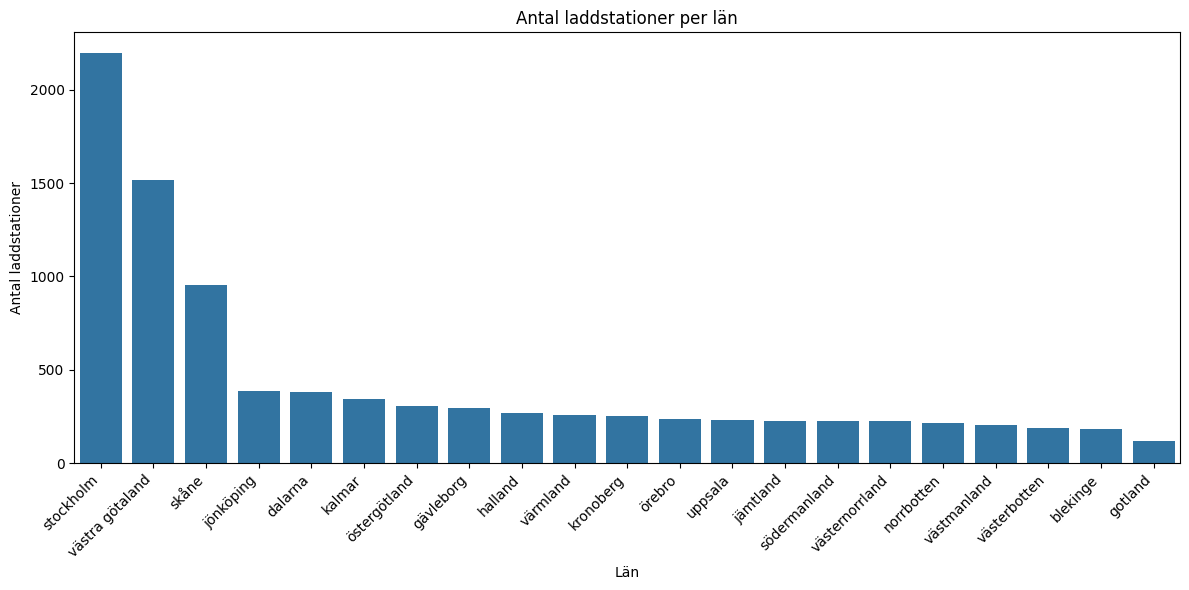

In [ ]:
# Antal laddstationer per län

# Aggregera per län
df_county = (
    df
    .groupby("COUNTY", as_index=False)
    .agg({
        "ANTAL_LADD_STATIONER": "sum",
        "LADDPUNKTER": "sum",
        "ANTAL_SNABB_LADD_STATIONER": "sum"
    })
)

# Sortera för första grafen
df_stationer = df_county.sort_values(
    "ANTAL_LADD_STATIONER", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_stationer,
    x="COUNTY",
    y="ANTAL_LADD_STATIONER"
)

plt.xticks(rotation=45, ha="right")
plt.title("Antal laddstationer per län")
plt.xlabel("Län")
plt.ylabel("Antal laddstationer")
plt.tight_layout()
plt.show()



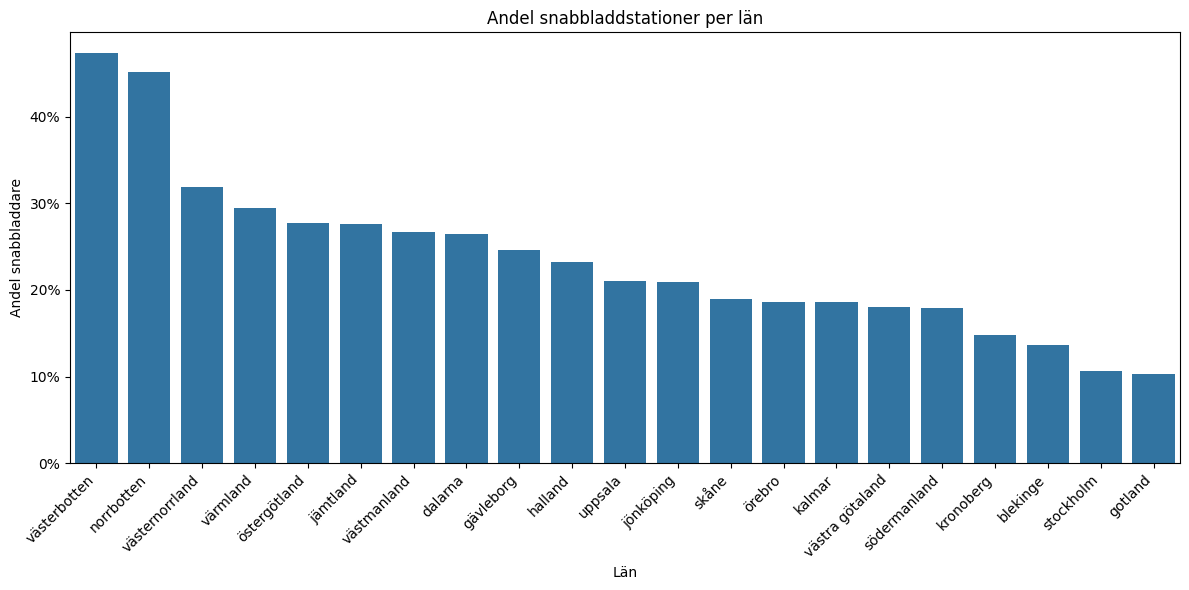

In [ ]:
# Antal snabbladare per län


# Aggregera per län
df_county = (
    df
    .groupby("COUNTY", as_index=False)
    .agg({
        "ANTAL_LADD_STATIONER": "sum",
        "ANTAL_SNABB_LADD_STATIONER": "sum"
    })
)

# Beräkna andel
df_county["ANDEL_SNABBLADD"] = (
    df_county["ANTAL_SNABB_LADD_STATIONER"] /
    df_county["ANTAL_LADD_STATIONER"]
)

# Sortera
df_county = df_county.sort_values(
    "ANDEL_SNABBLADD", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_county,
    x="COUNTY",
    y="ANDEL_SNABBLADD"
)

plt.xticks(rotation=45, ha="right")
plt.title("Andel snabbladdstationer per län")
plt.xlabel("Län")
plt.ylabel("Andel snabbladdare")
plt.gca().yaxis.set_major_formatter(lambda x, _: f"{x:.0%}")
plt.tight_layout()
plt.show()


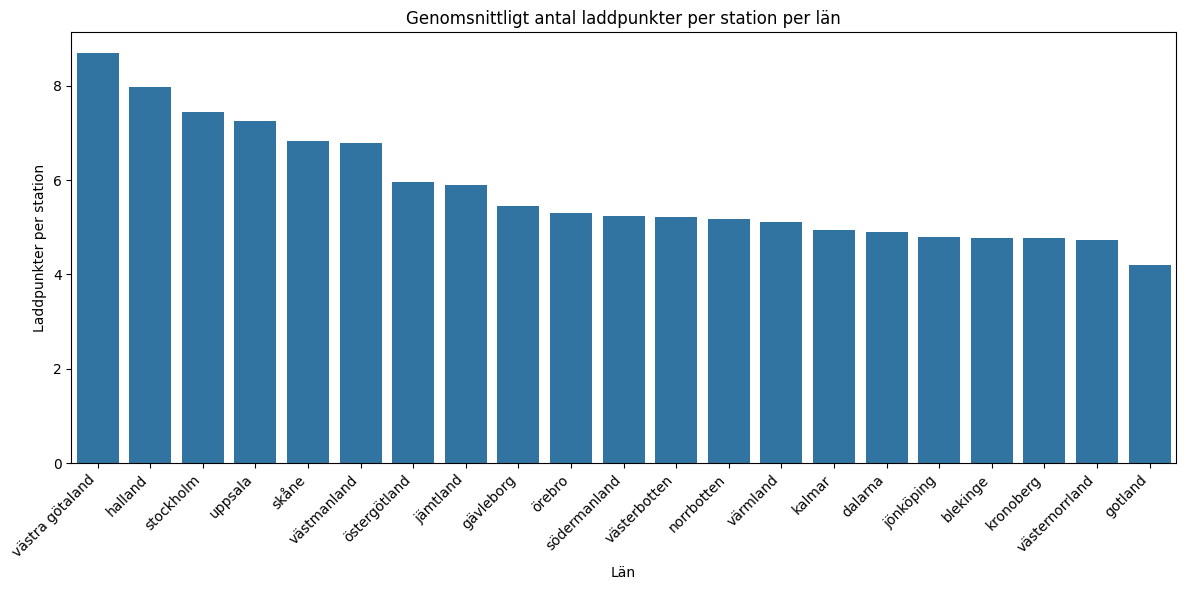

In [11]:
# Laddpunkter per station per län

# Aggregera per län
df_county = (
    df
    .groupby("COUNTY", as_index=False)
    .agg({
        "ANTAL_LADD_STATIONER": "sum",
        "LADDPUNKTER": "sum"
    })
)

# Skydd mot division med 0
df_county = df_county[df_county["ANTAL_LADD_STATIONER"] > 0]

# Beräkna laddpunkter per station
df_county["LADDPUNKTER_PER_STATION"] = (
    df_county["LADDPUNKTER"] /
    df_county["ANTAL_LADD_STATIONER"]
)

# Sortera
df_county = df_county.sort_values(
    "LADDPUNKTER_PER_STATION", ascending=False
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_county,
    x="COUNTY",
    y="LADDPUNKTER_PER_STATION"
)

plt.xticks(rotation=45, ha="right")
plt.title("Genomsnittligt antal laddpunkter per station per län")
plt.xlabel("Län")
plt.ylabel("Laddpunkter per station")
plt.tight_layout()
plt.show()


In [ ]:
df_scatter = (
    df_infra
    .groupby("COUNTY", as_index=False)
    .agg({
        "TOTAL_VEHICLE": "sum",
        "ANTAL_LADD_STATIONER": "sum"
    })
)


In [36]:
df_scatter.sort_values(
    ["TOTAL_VEHICLE", "ANTAL_LADD_STATIONER"],
    ascending=False
).head(5)

,COUNTY,TOTAL_VEHICLE,ANTAL_LADD_STATIONER
11,stockholm,1334553,2197
18,västra götaland,560641,1514
10,skåne,428373,954
20,östergötland,138209,307
13,uppsala,111966,233


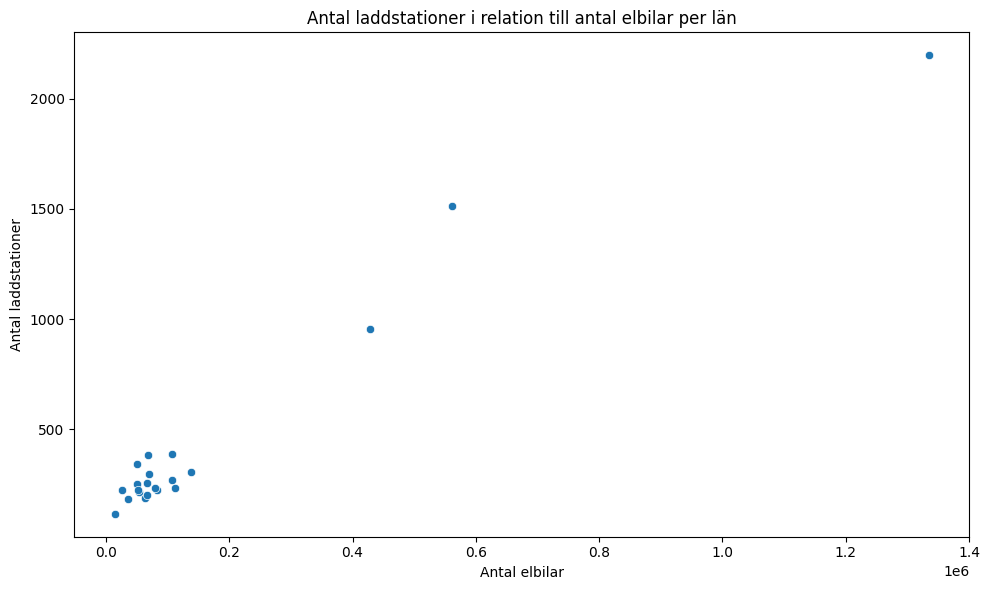

In [ ]:
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter



plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_scatter,
    x="TOTAL_VEHICLE",
    y="ANTAL_LADD_STATIONER",
    scatter=True,
    ci=None
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x/1000)}k")
)

plt.title("Antal laddstationer i relation till antal elbilar per län")
plt.xlabel("Antal elbilar")
plt.ylabel("Antal laddstationer")
plt.tight_layout()
plt.show()



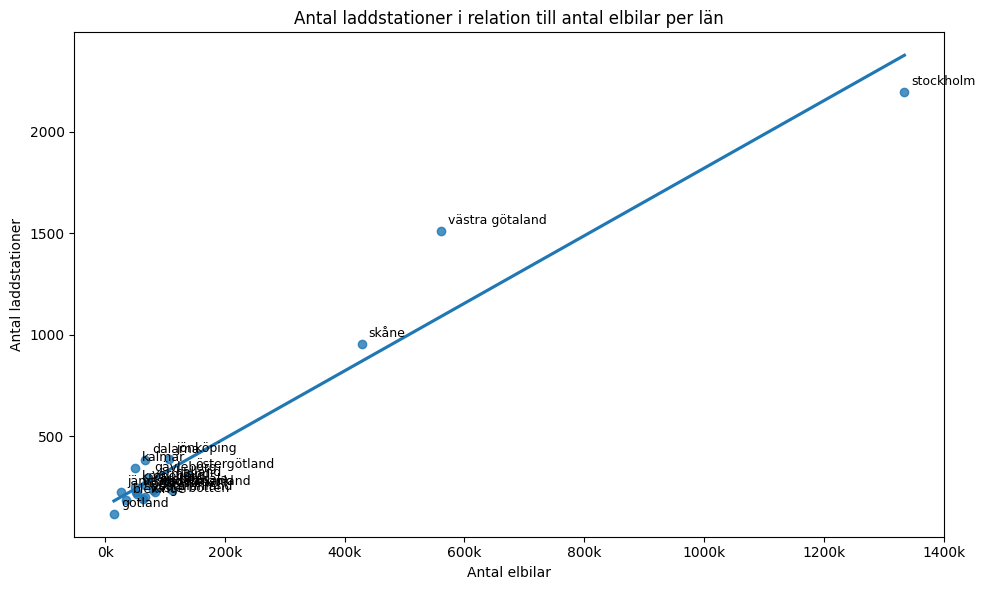

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_scatter,
    x="TOTAL_VEHICLE",
    y="ANTAL_LADD_STATIONER",
    scatter=True,
    ci=None
)

ax = plt.gca()
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{int(x/1000)}k")
)

# Annotera varje punkt med länsnamn
for _, row in df_scatter.iterrows():
    ax.annotate(
        row["COUNTY"],
        (row["TOTAL_VEHICLE"], row["ANTAL_LADD_STATIONER"]),
        textcoords="offset points",
        xytext=(5, 5),
        fontsize=9
    )

plt.title("Antal laddstationer i relation till antal elbilar per län")
plt.xlabel("Antal elbilar")
plt.ylabel("Antal laddstationer")
plt.tight_layout()
plt.show()


In [ ]:
import streamlit as st
from backend.data_processing import query_analytics
from frontend.graph.chart_utils import (
    laddstationer_typ_per_kommun_stacked,
    laddpunkter_per_station_bar,
    infrastruktur_vs_elbilar_scatter
)

# =========================
# PAGE CONFIG
# =========================

st.set_page_config(
    page_title="Charger analysis",
    page_icon="⚡",
    layout="wide"
)

# =========================
# HEADER
# =========================

st.title("⚡ Charger analysis")

st.markdown(
    """
    **Interaktiv analys av Sveriges publika laddinfrastruktur.**  
    Analysen visar hur kommunerna inom ett län bidrar till både
    omfattning och typ av laddkapacitet.
    """
)

st.divider()

# =========================
# DATA
# =========================

df_nr_charger = query_analytics("nr_charger")
df_infra = query_analytics("infrastructur")

# =========================
# CONTROL PANEL
# =========================

with st.container(border=True):
    st.markdown("### 🔧 Kontrollpanel")

    county_options = ["Välj län"] + sorted(df_nr_charger["COUNTY"].unique())

    county = st.selectbox(
        "Län",
        options=county_options,
        index=0,
        help="Välj ett län för att visa statistik per kommun."
    )

st.divider()

# =========================
# RESULTS
# =========================

if county != "Välj län":

    st.subheader(f"📊 Sammanfattning – {county}")

    df_nr_charger_county = df_nr_charger[df_nr_charger["COUNTY"] == county]
    df_infra_county = df_infra[df_infra["COUNTY"] == county]

    col1, col2, col3 = st.columns(3)

    with col1:
        total_stationer = df_nr_charger_county["ANTAL_LADD_STATIONER"].sum()
        st.metric("Antal laddstationer", int(total_stationer))

    with col2:
        laddpunkter = df_nr_charger_county["LADDPUNKTER"].sum()
        st.metric("Antal laddpunkter", int(laddpunkter))

    with col3:
        fast = df_nr_charger_county["ANTAL_SNABB_LADD_STATIONER"].sum()
        st.metric(
            "Andel snabbladdare",
            f"{round((fast / total_stationer) * 100, 1)} %"
        )

    st.divider()

    # =========================
    # KOMMUNANALYS
    # =========================

    st.subheader("🏙️ Kommunernas roll i länets laddinfrastruktur")

    st.plotly_chart(
        laddstationer_typ_per_kommun_stacked(df_nr_charger, county),
        use_container_width=True
    )

    st.caption(
        "Staplarna visar både omfattning och typ av laddinfrastruktur per kommun. "
        "Större kommuner dominerar i volym, medan flera mindre kommuner uppvisar "
        "en relativt hög andel snabbladdning."
    )

    st.divider()

    st.plotly_chart(
        laddpunkter_per_station_bar(df_nr_charger, county),
        use_container_width=True
    )

    st.caption(
        "Grafen visar hur tät laddinfrastrukturen är i genomsnitt. "
        "Högre värden indikerar stationer med fler laddpunkter."
    )

    st.divider()

    st.subheader("🚗 Infrastruktur i relation till elbilar")

    st.altair_chart(
        infrastruktur_vs_elbilar_scatter(df_infra, county),
        use_container_width=True
    )

    st.caption(
        "Relationen mellan antal elbilar och laddstationer per kommun "
        "indikerar var infrastrukturen är relativt väl- eller underdimensionerad."
    )

else:
    st.info("⬆️ Välj ett län i kontrollpanelen för att visa analys.")


In [ ]:
import plotly_express as px
from backend.data_processing import query_analytics
import altair as alt


def horizontal_number_station_bar_chart(county):
    
    df = query_analytics("nr_charger")

    data = df[df["county"] == county]
    
    fig = px.bar(data, x="antal_ladd_stationer", y="municipality", title="Antal laddstationer för varje kommun", orientation="h")
    
    fig.update_layout(
        height = 35 * len(data) + 150
    )
    
    fig.update_yaxes(automargin= True)
    return fig 


def prepare_municipality_df(df, county):
    """
    Filtrerar på valt län och aggregerar per kommun.
    """
    return (
        df[df["COUNTY"] == county]
        .groupby("MUNICIPALITY", as_index=False)
        .agg({
            "ANTAL_LADD_STATIONER": "sum",
            "LADDPUNKTER": "sum",
            "ANTAL_SNABB_LADD_STATIONER": "sum"
        })
    )


def laddstationer_typ_per_kommun_stacked(df, county):
    """
    Staplad graf som visar vanliga laddstationer och snabbladdare
    per kommun i valt län (alla kommuner).
    """
    df_muni = prepare_municipality_df(df, county)

    df_muni["VANLIGA_LADDSTATIONER"] = (
        df_muni["ANTAL_LADD_STATIONER"] - df_muni["ANTAL_SNABB_LADD_STATIONER"]
    )

    df_muni = df_muni.sort_values(
        "ANTAL_LADD_STATIONER", ascending=False
    )

    df_long = df_muni.melt(
        id_vars="MUNICIPALITY",
        value_vars=[
            "VANLIGA_LADDSTATIONER",
            "ANTAL_SNABB_LADD_STATIONER"
        ],
        var_name="TYP",
        value_name="ANTAL"
    )

    df_long["TYP"] = df_long["TYP"].replace({
        "VANLIGA_LADDSTATIONER": "Vanliga laddstationer",
        "ANTAL_SNABB_LADD_STATIONER": "Snabbladdstationer"
    })

    fig = px.bar(
        df_long,
        x="ANTAL",
        y="MUNICIPALITY",
        color="TYP",
        orientation="h",
        barmode="stack",
        title="Fördelning av laddstationstyper per kommun",
        labels={
            "ANTAL": "Antal laddstationer",
            "MUNICIPALITY": "Kommun",
            "TYP": "Typ av laddning"
        }
    )

    fig.update_layout(
        yaxis=dict(autorange="reversed"),
        legend_title_text="",
        height=35 * df_muni["MUNICIPALITY"].nunique() + 150
    )

    return fig


def laddpunkter_per_station_bar(df, county):
    """
    Visar genomsnittligt antal laddpunkter per station per kommun.
    """
    df_muni = prepare_municipality_df(df, county)
    df_muni = df_muni[df_muni["ANTAL_LADD_STATIONER"] > 0]

    df_muni["LADDPUNKTER_PER_STATION"] = (
        df_muni["LADDPUNKTER"] /
        df_muni["ANTAL_LADD_STATIONER"]
    )

    df_muni = df_muni.sort_values(
        "LADDPUNKTER_PER_STATION", ascending=False
    )

    fig = px.bar(
        df_muni,
        x="LADDPUNKTER_PER_STATION",
        y="MUNICIPALITY",
        orientation="h",
        title="Laddpunkter per station per kommun",
        labels={
            "LADDPUNKTER_PER_STATION": "Laddpunkter per station",
            "MUNICIPALITY": "Kommun"
        }
    )

    fig.update_layout(
        yaxis=dict(autorange="reversed"),
        height=35 * df_muni["MUNICIPALITY"].nunique() + 150
    )

    return fig


def infrastruktur_vs_elbilar_scatter(df_infra, county):
    """
    Scatterplot som visar relationen mellan antal elbilar
    och antal laddstationer per kommun.
    """
    df_plot = (
        df_infra[df_infra["COUNTY"] == county]
        .groupby("MUNICIPALITY", as_index=False)
        .agg({
            "TOTAL_VEHICLE": "sum",
            "ANTAL_LADD_STATIONER": "sum"
        })
    )

    chart = (
        alt.Chart(df_plot)
        .mark_circle(size=120)
        .encode(
            x=alt.X("TOTAL_VEHICLE:Q", title="Antal elbilar"),
            y=alt.Y("ANTAL_LADD_STATIONER:Q", title="Antal laddstationer"),
            tooltip=[
                "MUNICIPALITY",
                "TOTAL_VEHICLE",
                "ANTAL_LADD_STATIONER"
            ]
        )
        .properties(
            title="Infrastruktur i relation till elbilar (kommunnivå)",
            height=400
        )
    )

    return chart

In [ ]:
import streamlit as st
from pathlib import Path

st.markdown(
    """
    <style>
    /* ===== SIDEBAR ===== */
    section[data-testid="stSidebar"],
    section[data-testid="stSidebar"] > div {
        background-color: #0F3D2E;
    }

    section[data-testid="stSidebar"] * {
        color: #E8FFF6;
    }
    </style>
    """,
    unsafe_allow_html=True
)
BASE_DIR = Path(__file__).resolve().parents[2]

# Assets-mapp
ASSETS_DIR = BASE_DIR / "backend" / "assets"
st.image(
    str(ASSETS_DIR / "hero_urban_charging_evening.png"),
    use_column_width=False
)


st.set_page_config(
    page_title="Laddinfrastruktur i Sverige",
    page_icon="🔌",
    layout="wide",
    initial_sidebar_state="expanded"
)

# =========================
# SIDEBAR – ORIENTERING
# =========================

with st.sidebar:
    st.markdown("## 🔌 Laddinfrastruktur i Sverige")

    st.markdown(
        """
        En samlad vy över hur Sveriges publika laddinfrastruktur är utbyggd, hur kapacitetsstark den är och hur väl den matchar elbilsflottans storlek
        """
    )

    st.divider()

    st.markdown("### 🎯 Syfte")
    st.markdown(
        """
        • Jämföra laddkapacitet mellan län  
        • Synliggöra skillnader i laddtyper  
        • Relatera laddning till elbilsbestånd  
        """
    )

    st.divider()
    st.caption("Dashboard för analys och planering")

# =========================
# HERO
# =========================

st.title("Laddinfrastruktur i Sverige")
st.caption("Överblick av publik laddning i ett elektrifierat samhälle")
st.divider()

# =========================
# INTRO
# =========================

st.markdown(
    """
    **En samlad vy över hur Sveriges publika laddinfrastruktur är uppbyggd
    och hur väl den möter efterfrågan från elbilsflottan.**
    """
)

# =========================
# SEKTION: ÖVERSIKT
# =========================

col1, col2 = st.columns(2, gap="large")

with col1:
    with st.container(border=True):
        st.subheader("Helhetsbild")
        st.write(
            "Nationell översikt av laddinfrastrukturens omfattning, "
            "fördelning och kapacitet."
        )

with col2:
    with st.container(border=True):
        st.subheader("Regionala skillnader")
        st.write(
            "Tillgången till laddning varierar mellan län och kommuner "
            "beroende på lokala förutsättningar."
        )


# =========================
# SEKTION: VAD KAN DU ANALYSERA
# =========================

c1, c2, c3 = st.columns(3, gap="large")

with c1:
    with st.container(border=True):
        st.subheader("Elbilsutveckling")
        st.write("Antalet elbilar ökar snabbt i hela landet.")

with c2:
    with st.container(border=True):
        st.subheader("Laddtyper")
        st.write("Snabbladdning och normalladdning fyller olika behov.")

with c3:
    with st.container(border=True):
        st.subheader("Kapacitet")
        st.write("Hur väl möter infrastrukturen efterfrågan?")

st.divider()

# =========================
# CTA – STARTA ANALYS
# =========================


cta_col1, cta_col2, cta_col3 = st.columns([1, 2, 1])

with cta_col2:
    with st.container(border=True):
        st.write(
            """
            Gå vidare till **Charger analysis** för att analysera
            laddstationer, laddpunkter och kapacitet per län
            och kommun.
            """
        )

        if st.button(
            "▶ Öppna analysverktyget",
            use_container_width=True,
            type="primary"
        ):
            st.switch_page("pages/charger_analys_page.py")


In [ ]:
import streamlit as st

st.markdown(
    """
    <style>
    /* ===== SIDEBAR ===== */
    section[data-testid="stSidebar"],
    section[data-testid="stSidebar"] > div {
        background-color: #0F3D2E;
    }

    section[data-testid="stSidebar"] * {
        color: #E8FFF6;
    }
    </style>
    """,
    unsafe_allow_html=True
)


st.set_page_config(
    page_title="Laddinfrastruktur i Sverige",
    page_icon="🔌",
    layout="wide",
    initial_sidebar_state="expanded"
)

# =========================
# SIDEBAR – ORIENTERING
# =========================

with st.sidebar:
    st.markdown("## 🔌 Laddinfrastruktur i Sverige")

    st.markdown(
        """
        En samlad vy över hur Sveriges publika laddinfrastruktur är utbyggd, hur kapacitetsstark den är och hur väl den matchar elbilsflottans storlek
        """
    )

    st.divider()

    st.markdown("### 🎯 Syfte")
    st.markdown(
        """
        • Jämföra laddkapacitet mellan län  
        • Synliggöra skillnader i laddtyper  
        • Relatera laddning till elbilsbestånd  
        """
    )

    st.divider()
    st.caption("Dashboard för analys och planering")

# =========================
# HERO
# =========================

st.title("Laddinfrastruktur i Sverige")
st.caption("Överblick av publik laddning i ett elektrifierat samhälle")
st.divider()

# =========================
# INTRO
# =========================

st.markdown(
    """
    **En samlad vy över hur Sveriges publika laddinfrastruktur är uppbyggd
    och hur väl den möter efterfrågan från elbilsflottan.**
    """
)

# =========================
# SEKTION: ÖVERSIKT
# =========================

col1, col2 = st.columns(2, gap="large")

with col1:
    with st.container(border=True):
        st.subheader("Helhetsbild")
        st.write(
            "Nationell översikt av laddinfrastrukturens omfattning, "
            "fördelning och kapacitet."
        )

with col2:
    with st.container(border=True):
        st.subheader("Regionala skillnader")
        st.write(
            "Tillgången till laddning varierar mellan län och kommuner "
            "beroende på lokala förutsättningar."
        )


# =========================
# SEKTION: VAD KAN DU ANALYSERA
# =========================

c1, c2, c3 = st.columns(3, gap="large")

with c1:
    with st.container(border=True):
        st.subheader("Elbilsutveckling")
        st.write("Antalet elbilar ökar snabbt i hela landet.")

with c2:
    with st.container(border=True):
        st.subheader("Laddtyper")
        st.write("Snabbladdning och normalladdning fyller olika behov.")

with c3:
    with st.container(border=True):
        st.subheader("Kapacitet")
        st.write("Hur väl möter infrastrukturen efterfrågan?")

st.divider()

# =========================
# CTA – STARTA ANALYS
# =========================


cta_col1, cta_col2, cta_col3 = st.columns([1, 2, 1])

with cta_col2:
    with st.container(border=True):
        st.write(
            """
            Gå vidare till **Charger analysis** för att analysera
            laddstationer, laddpunkter och kapacitet per län
            och kommun.
            """
        )

        if st.button(
            "▶ Öppna analysverktyget",
            use_container_width=True,
            type="primary"
        ):
            st.switch_page("pages/charger_analys_page.py")
